## Section -3 Russia Energy Exports Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Russia Exports -phase 4/russia_export_final_2016-2021.csv")
df.head()

,Year,China,India,EU,Turkey,Others,Energy Type
0,2016,14000,200,44000,700,14800,Crude Oil
1,2017,19000,200,50000,900,23500,Crude Oil
2,2018,29000,200,65000,1300,33500,Crude Oil
3,2019,32000,200,60000,1200,27600,Crude Oil
4,2020,28000,200,35000,700,8700,Crude Oil


Melting data to single Column for countries

In [3]:
import pandas as pd

# --- Step 1: Load your table ---
# If your data is in a CSV, replace 'your_file.csv' with the filename
# df = pd.read_csv('your_file.csv')

# If you already have a DataFrame (like from your image), let's assume it's called df

# --- Step 2: Melt the table ---
df_long = df.melt(id_vars=['Year','Energy Type'], 
                  value_vars=['China','India','EU','Turkey','Others'],
                  var_name='Country',
                  value_name='Total Price (USD Million)')

# --- Step 3: Reorder columns ---
df_long = df_long[['Country','Energy Type','Total Price (USD Million)','Year']]

# --- Step 4: Sort if needed ---
df_long = df_long.sort_values(['Year','Country','Energy Type']).reset_index(drop=True)

# --- Step 5: Preview ---
print(df_long.head(20))


   Country         Energy Type  Total Price (USD Million)  Year
0    China                Coal                       2500  2016
1    China           Crude Oil                      14000  2016
2    China      Gas (Pipeline)                          0  2016
3    China  Petroleum Products                       2000  2016
4       EU                Coal                       1500  2016
5       EU           Crude Oil                      44000  2016
6       EU      Gas (Pipeline)                      30000  2016
7       EU  Petroleum Products                      20000  2016
8    India                Coal                        600  2016
9    India           Crude Oil                        200  2016
10   India      Gas (Pipeline)                          0  2016
11   India  Petroleum Products                        400  2016
12  Others                Coal                       3300  2016
13  Others           Crude Oil                      14800  2016
14  Others      Gas (Pipeline)          

Loading 2022 to 2025 Data of Russia

In [4]:
russia_22_25 = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Russia Exports -phase 4/russia_energy_exports_bychatgpt.csv")


In [5]:
russia_22_25

,Country,Energy Type,Total Price (USD Million),Month,Year
0,China,Crude Oil,3093.8,January,2022
1,India,Crude Oil,2475.0,January,2022
2,EU,Crude Oil,3712.5,January,2022
3,Turkey,Crude Oil,618.8,January,2022
4,Others,Crude Oil,2475.0,January,2022
...,...,...,...,...,...
995,China,LNG,300.0,August,2025
996,India,LNG,133.3,August,2025
997,EU,LNG,100.0,August,2025
998,Turkey,LNG,33.3,August,2025


In [6]:
russia_22_25["Month_year"] = pd.to_datetime(
    russia_22_25["Month"] + " " + russia_22_25["Year"].astype(str),
    format="%B %Y"   # short month name + 4-digit year
)


In [7]:
russia_22_25.columns

Index(['Country', 'Energy Type', 'Total Price (USD Million)', 'Month', 'Year',
       'Month_year'],
      dtype='object')

In [8]:
russia_yearly_22_25 = russia_22_25.groupby(["Year","Country","Energy Type"])["Total Price (USD Million)"].sum().reset_index()

In [9]:
russia_yearly_22_25.columns

Index(['Year', 'Country', 'Energy Type', 'Total Price (USD Million)'], dtype='object')

In [10]:
russia_16_21 = df_long

In [11]:
russia_16_21.columns

Index(['Country', 'Energy Type', 'Total Price (USD Million)', 'Year'], dtype='object')

Combining  both 16 to 21 and 22 to 25 data together with same column order  

In [12]:
# Reorder russia_16_21
russia_16_21 = russia_16_21[['Year', 'Country', 'Energy Type', 'Total Price (USD Million)']]

# Reorder russia_yearly_22_25
russia_yearly_22_25 = russia_yearly_22_25[['Year', 'Country', 'Energy Type', 'Total Price (USD Million)']]

# Merge (append)
russia_all = pd.concat([russia_16_21, russia_yearly_22_25], ignore_index=True)

# Optional: sort by Year
russia_all = russia_all.sort_values(by="Year").reset_index(drop=True)


#### Analysis of 2016 -2025 Russia Exports

In [13]:
russia_all.columns

Index(['Year', 'Country', 'Energy Type', 'Total Price (USD Million)'], dtype='object')

### Russia Energy  Exports (2016-2025) - Line Chart

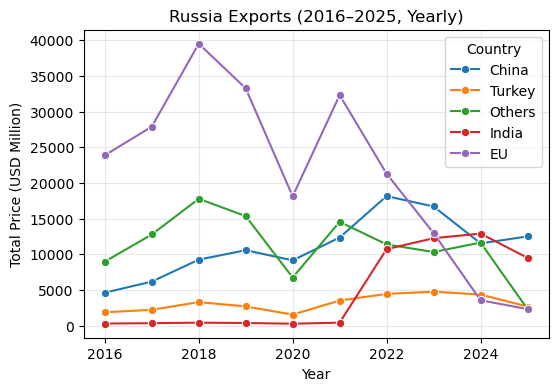

In [14]:
plt.figure(figsize=(6,4))

sns.lineplot(
    data=russia_all,
    x="Year",
    y="Total Price (USD Million)",
    hue="Country",
    marker="o",
    errorbar=None   # <- removes shaded background
)

plt.title("Russia Exports (2016–2025, Yearly)")
plt.ylabel("Total Price (USD Million)")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.show()


#### Categorised for each Energy Type

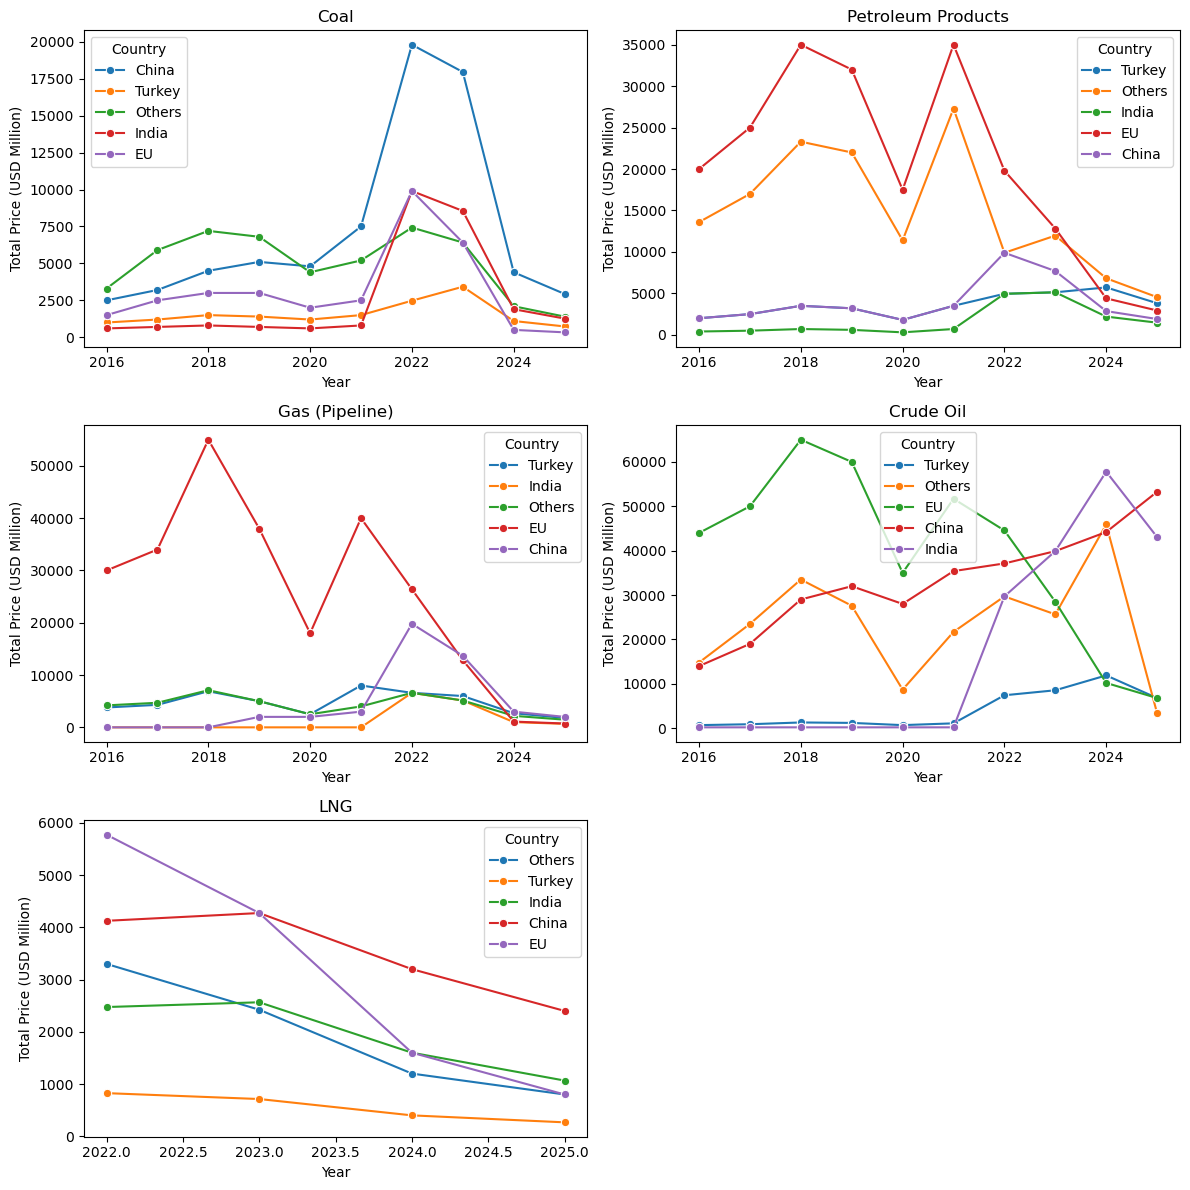

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get unique energy types
energy_types = russia_all["Energy Type"].unique()
num_energy = len(energy_types)

# Automatically calculate rows and columns
ncols = 2
nrows = math.ceil(num_energy / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))
axes = axes.flatten()

for i, energy in enumerate(energy_types):
    ax = axes[i]
    subset = russia_all[russia_all["Energy Type"] == energy]
    
    sns.lineplot(
        data=subset,
        x="Year",
        y="Total Price (USD Million)",
        hue="Country",
        marker="o",
        ax=ax,
        errorbar=None
    )
    
    ax.set_title(energy)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Price (USD Million)")
    ax.legend(title="Country")

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Percentage Wise Data

In [16]:
# Sum total exports per year
total_per_year = russia_all.groupby("Year")["Total Price (USD Million)"].sum().reset_index()
total_per_year.rename(columns={"Total Price (USD Million)": "Total_Yearly"}, inplace=True)

# Merge back to get total per year for each row
russia_pct = russia_all.merge(total_per_year, on="Year")

# Calculate percentage share
russia_pct["Percent Share"] = (russia_pct["Total Price (USD Million)"] / russia_pct["Total_Yearly"]) * 100


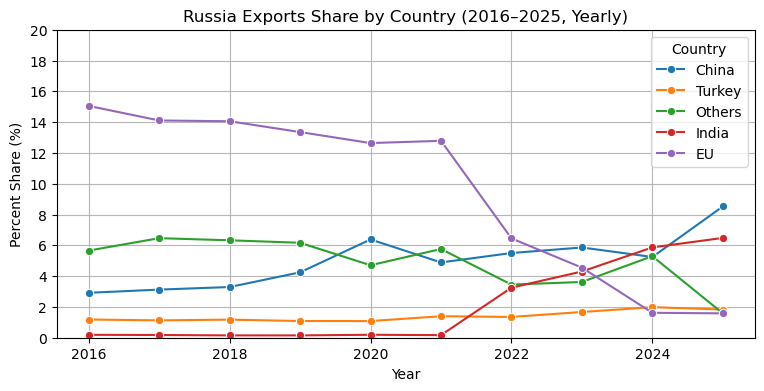

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(9,4))

sns.lineplot(
    data=russia_pct,
    x="Year",
    y="Percent Share",
    hue="Country",
    marker="o",
    errorbar=None  # remove shading
)

plt.title("Russia Exports Share by Country (2016–2025, Yearly)")
plt.ylabel("Percent Share (%)")
plt.xlabel("Year")
plt.grid(True, alpha=0.9)

# Set y-axis max to 20 and define custom ticks
plt.ylim(0, 20)
plt.yticks(np.arange(0, 21, 2))  # ticks from 0 to 20 with step 2

plt.show()


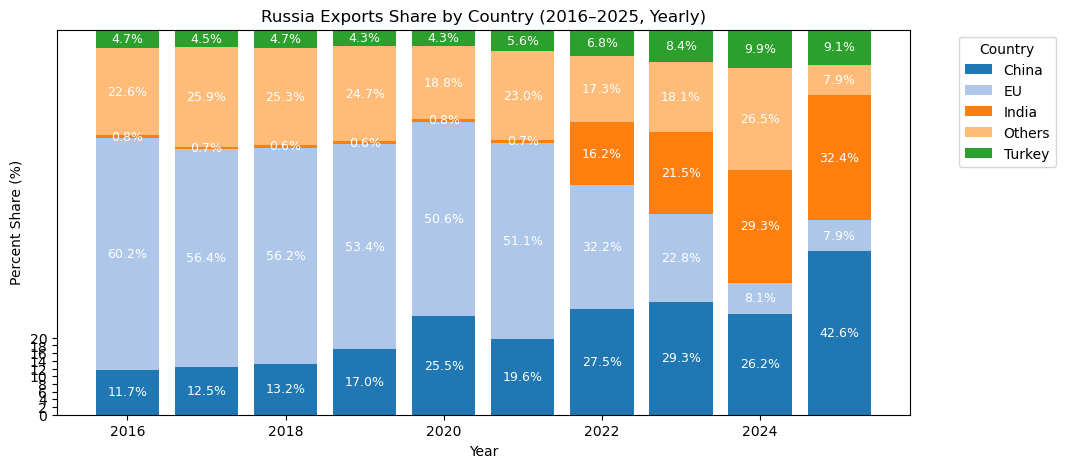

In [18]:
# Sum percentage share per year and country (just in case duplicates exist)
russia_pct_grouped = russia_pct.groupby(["Year", "Country"], as_index=False)["Percent Share"].sum()

pivoted = russia_pct_grouped.pivot(index="Year", columns="Country", values="Percent Share").fillna(0)

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(11,5))

bottom = np.zeros(len(pivoted))
colors = plt.cm.tab20.colors  # color palette

for i, col in enumerate(pivoted.columns):
    bars = ax.bar(pivoted.index, pivoted[col], bottom=bottom, label=col, color=colors[i % len(colors)])
    
    # Add data labels
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bottom[j] + height/2,
                f"{height:.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )
    bottom += pivoted[col].values

ax.set_ylabel("Percent Share (%)")
ax.set_xlabel("Year")
ax.set_title("Russia Exports Share by Country (2016–2025, Yearly)")
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 21, 2))
ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#### Russia Energy Exports (India+China - Grouped) 2016-2025  - Line Chart

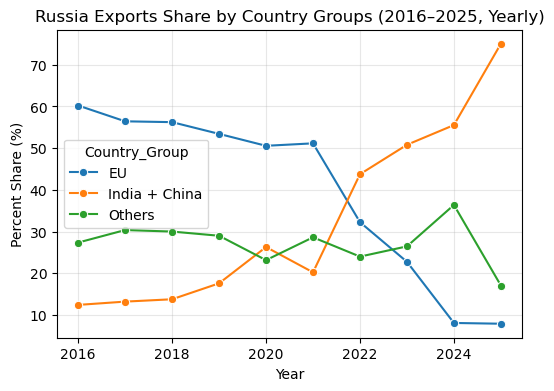

In [19]:
import pandas as pd
import numpy as np

# Create a new column for grouped countries
def group_country(country):
    if country in ["India", "China"]:
        return "India + China"
    elif country == "EU":
        return "EU"
    else:
        return "Others"

russia_pct["Country_Group"] = russia_pct["Country"].apply(group_country)

# Aggregate total price by year and country group
grouped = russia_pct.groupby(["Year", "Country_Group"], as_index=False)["Total Price (USD Million)"].sum()

# Calculate percentage share per year
total_per_year = grouped.groupby("Year")["Total Price (USD Million)"].sum().reset_index()
total_per_year.rename(columns={"Total Price (USD Million)":"Total_Yearly"}, inplace=True)

grouped = grouped.merge(total_per_year, on="Year")
grouped["Percent Share"] = (grouped["Total Price (USD Million)"] / grouped["Total_Yearly"]) * 100


plt.figure(figsize=(6,4))

sns.lineplot(
    data=grouped,
    x="Year",
    y="Percent Share",
    hue="Country_Group",
    marker="o",
    errorbar=None
)

plt.title("Russia Exports Share by Country Groups (2016–2025, Yearly)")
plt.ylabel("Percent Share (%)")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
# optional: set max for clarity  plt.ylim(0, 50)
plt.show()

#### Stacked Column chart for same Data (grouped -india + China) ,EU and Others

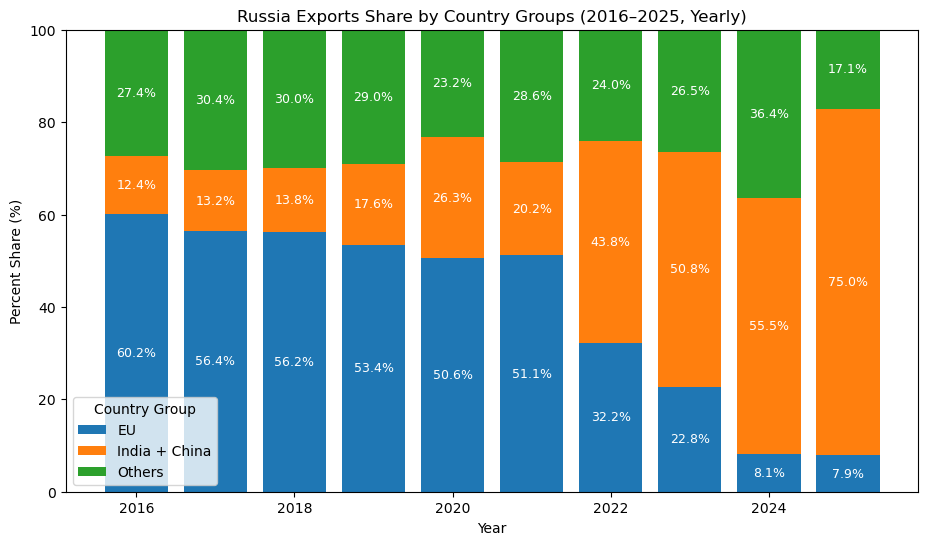

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pivot data: rows = Year, columns = Country_Group, values = Percent Share
pivoted = grouped.pivot(index="Year", columns="Country_Group", values="Percent Share").fillna(0)

fig, ax = plt.subplots(figsize=(11,6))

bottom = np.zeros(len(pivoted))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # customize colors if you like

for i, col in enumerate(pivoted.columns):
    bars = ax.bar(pivoted.index, pivoted[col], bottom=bottom, label=col, color=colors[i])
    
    # Add labels on each segment
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:  # only label non-zero segments
            ax.text(
                bar.get_x() + bar.get_width()/2,     # x-position: center of bar
                bottom[j] + height/2,                # y-position: middle of segment
                f"{height:.1f}%",                     # text: percentage
                ha='center',
                va='center',
                color='white',
                fontsize=9
            )
    
    bottom += pivoted[col].values  # update bottom for next stack

ax.set_ylabel("Percent Share (%)")
ax.set_xlabel("Year")
ax.set_title("Russia Exports Share by Country Groups (2016–2025, Yearly)")
ax.set_ylim(0, 100)  # stacked to 100%
ax.legend(title="Country Group")
plt.show()


#### Bar chart for same Data (grouped -india + China) ,EU and Others

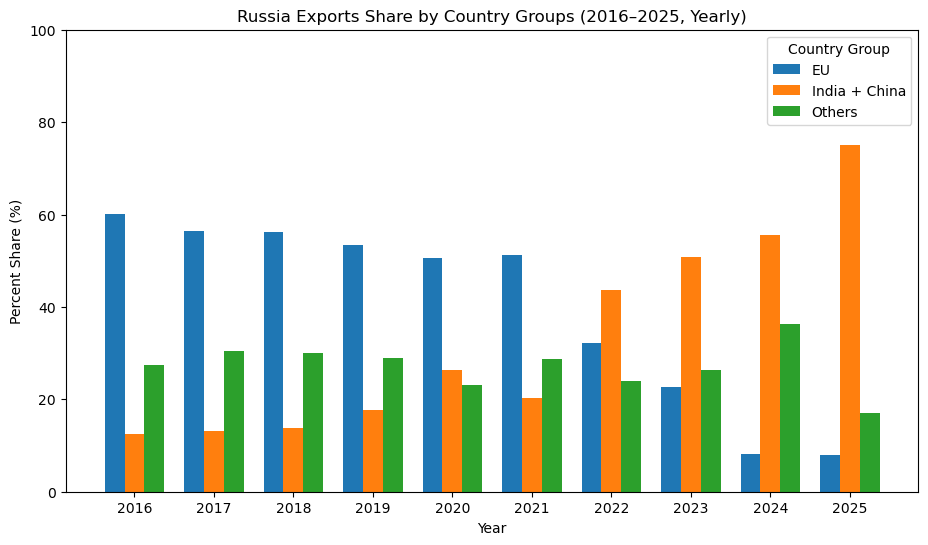

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pivot data: rows = Year, columns = Country_Group, values = Percent Share
pivoted = grouped.pivot(index="Year", columns="Country_Group", values="Percent Share").fillna(0)

years = pivoted.index
groups = pivoted.columns
num_groups = len(groups)
bar_width = 0.25  # width of each bar

# X positions for each year
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(11,6))

# Plot each country group with an offset
for i, col in enumerate(groups):
    ax.bar(x + i*bar_width, pivoted[col], width=bar_width, label=col)

# Set x-axis labels in the middle of grouped bars
ax.set_xticks(x + bar_width*(num_groups-1)/2)
ax.set_xticklabels(years)

ax.set_ylabel("Percent Share (%)")
ax.set_xlabel("Year")
ax.set_title("Russia Exports Share by Country Groups (2016–2025, Yearly)")
ax.set_ylim(0, 100)  # adjust if needed
ax.legend(title="Country Group")

plt.show()


Russia Total Exports Data- by amount in Dollars -millions

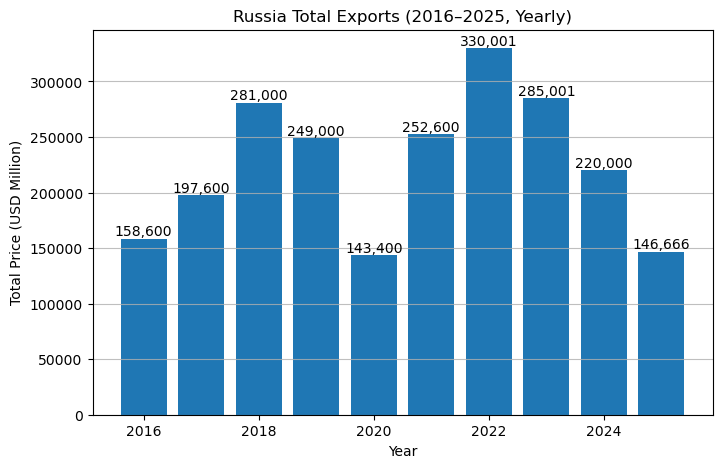

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate total exports per year
total_exports = russia_all.groupby("Year", as_index=False)["Total Price (USD Million)"].sum()

# Plot bar chart
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(
    total_exports["Year"],
    total_exports["Total Price (USD Million)"],
    color="#1f77b4"
)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # x-position: center of the bar
        height,                           # y-position: top of the bar
        f'{height:,.0f}',                 # text: formatted number with comma
        ha='center',
        va='bottom',                       # place label above the bar
        fontsize=10
    )

# Titles and labels
ax.set_title("Russia Total Exports (2016–2025, Yearly)")
ax.set_xlabel("Year")
ax.set_ylabel("Total Price (USD Million)")
ax.grid(True, axis='y', alpha=0.8)  # horizontal gridlines only

plt.show()


Insight on Russia’s Exports (2016–2025, Yearly):

Post-war period (2022–2025) shows a significant increase in export volume to India and China.

Despite the higher export volumes, the revenue share from these countries has decreased, indicating lower prices or discounting.

Historical context from your data:

2018: Total exports ≈ $275B

2022 (early war): Total exports ≈ $325B

2024: Total exports ≈ $220B 

Interpretation:

Russia has shifted trade patterns toward India and China post-2022.

Although export volumes grew, unit prices likely fell, causing share of revenue per partner to decline.

The overall export revenue peaked in 2022, then shows a partial decline in 2025 (incomplete data).

#### EarLier EU have 50% Share pre War, But Now in 2025 india + China consists of 75% Share  and EU Share Dropped 8%

#### 2022 to 2025 Monthy and Yearly Data analysis Not Done Due to Data in Not Accurate